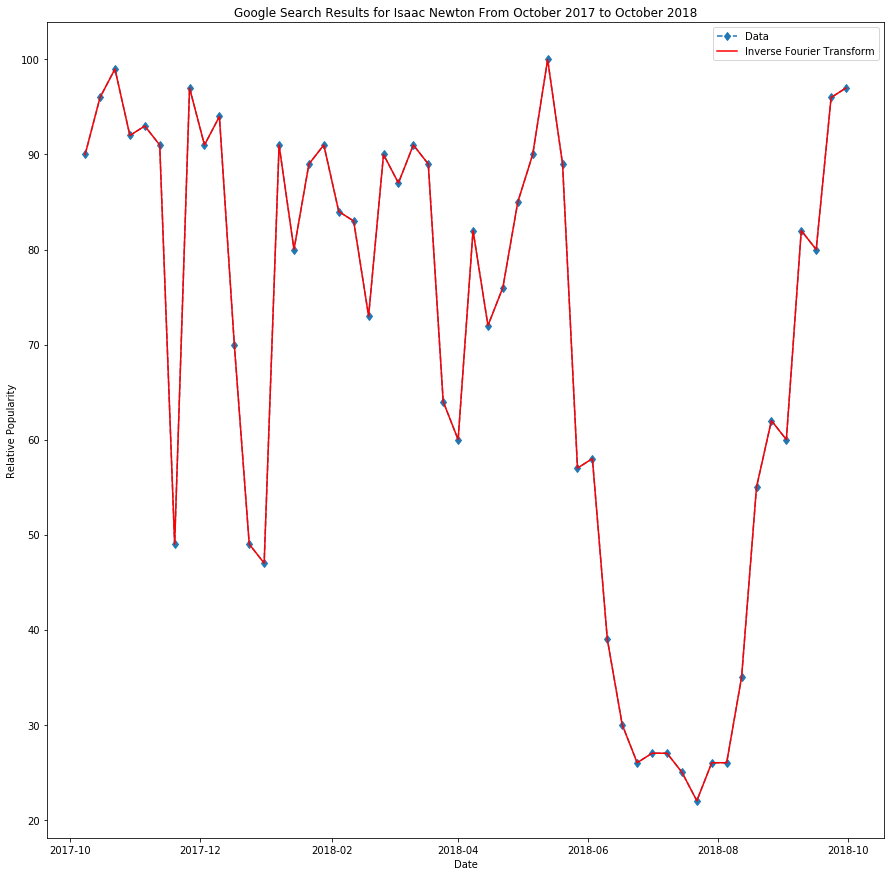

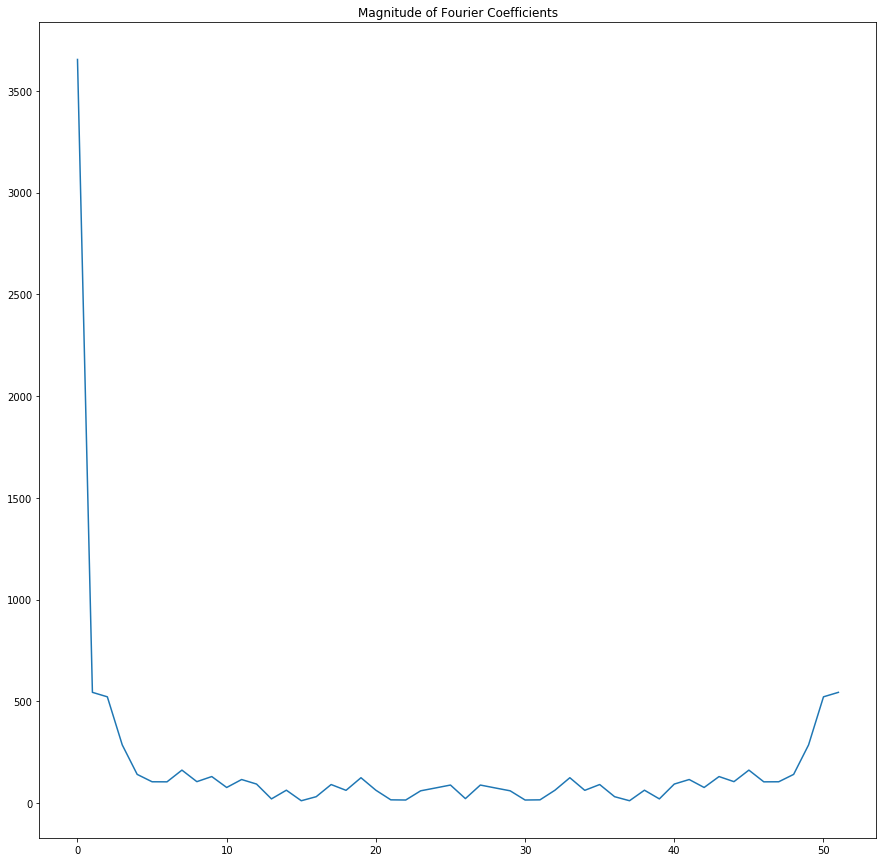

In [77]:
%matplotlib inline

#WE DO FOURIER TRANSFORM ON THE DATA ON SEARCH RESULTS FOR ISAAC NEWTON


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cmath import exp, pi

df = pd.read_excel('Newton.xlsx')
x=df.Week
y = df.Newt


#Discrete Fourier Transform
def DFT(y):
    N = len(y)
    c = np.zeros(N,complex)
    for k in range(N):
        for n in range(N):
            c[k] += y[n]*exp(-1j*(2.0*pi*k*n)/N)
    return c


#Inverse Fourier Transform
def IFT(c):
    N = len(c)
    y0 = np.zeros(N,complex)
    for k in range(N):
        for n in range(N):
            y0[k] += c[n]*exp(1j*(2.0*pi*k*n)/N)
    return y0
            

            
#Performing Fourier Transforms
c = DFT(y)
y1 = IFT(c).real/len(y)
            
#Graphing
plt.figure(figsize=(15,15))
plt.plot(x,y,'--d',label='Data')
plt.plot(x,y1,'r',label='Inverse Fourier Transform')
plt.ylabel('Relative Popularity')
plt.xlabel('Date')
plt.legend()
plt.title("Google Search Results for Isaac Newton From October 2017 to October 2018")
plt.show()


#Subplot for Magnitude to Analyze Magnitude of Fourier Coefficients
fig, mag = plt.subplots(figsize = (15,15))
mag.plot(np.abs(c), label='Magnitude')
plt.title("Magnitude of Fourier Coefficients")
plt.show()


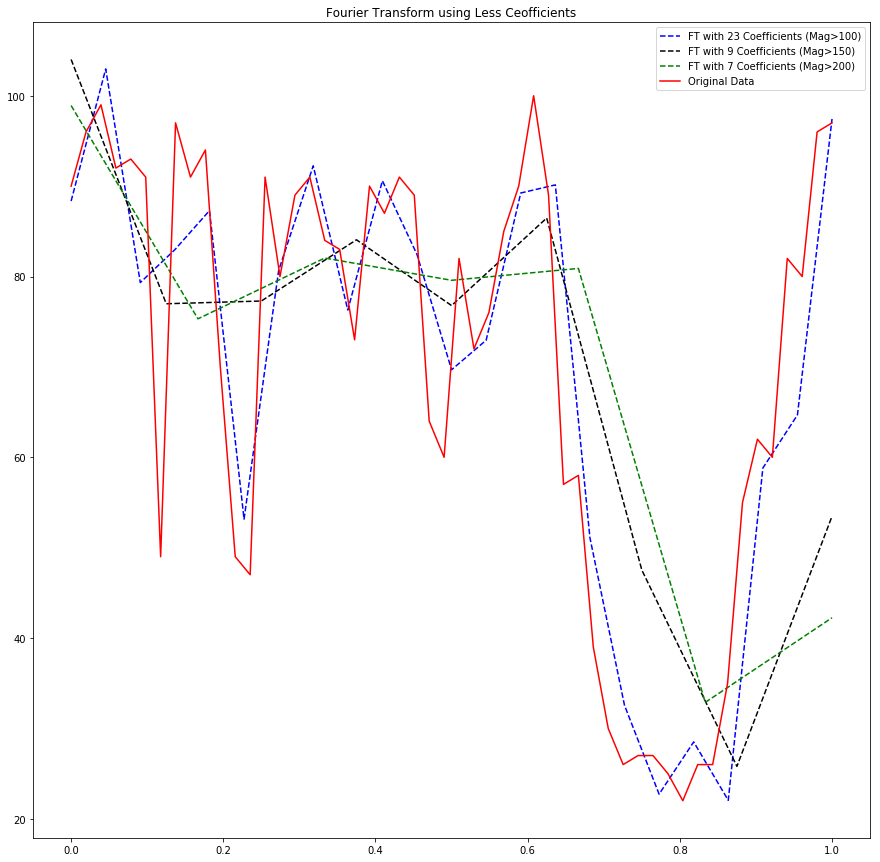

In [74]:
#We could probably just use the ones whose magnitude is greater than 100. Let's try.
#I replace the dates from the original data set with just numbers on the interval [0,1]

c1 = c[np.abs(c) > 100]
c2 = c[np.abs(c) > 150]
c3 = c[np.abs(c) > 200]

#y values for c1
y2 = IFT(c1).real/len(y)

#x values for c1
x2 = np.linspace(0,1,len(y2))


#x values for original data
x3 = np.linspace(0,1,len(y))


#y values for c2
y3 = IFT(c2).real/len(y)

#x values for c2
x4 = np.linspace(0,1,len(y3))


#y values for c3
y4 = IFT(c3).real/len(y)

#x values for c3
x5 = np.linspace(0,1,len(y4))



#Sizes of the c arrays
r = len(c1)
s = len(c2)
u = len(c3)


plt.figure(figsize=(15,15))
plt.plot(x2,y2,'--b',label = "FT with %r Coefficients (Mag>100)" %r)
plt.plot(x4,y3,'--k',label = "FT with %s Coefficients (Mag>150)" %s)
plt.plot(x5,y4,'--g',label = "FT with %u Coefficients (Mag>200)" %u)
plt.plot(x3,y,'r-', label  = "Original Data")

plt.title('Fourier Transform using Less Ceofficients')
plt.legend()
plt.show()